In [176]:
import numpy as np
import seaborn as sns        
import matplotlib.pyplot as plt                                             
import pandas as pd

In [177]:
df = pd.read_csv("spam.csv")
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [178]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [179]:
df["label"] = [1 if i == "spam" else 0 for i in df.label]
df["len_text"] = df["text"].apply(len)

In [180]:
df.isnull().sum()

label       0
text        0
len_text    0
dtype: int64

In [181]:
df.dtypes

label        int64
text        object
len_text     int64
dtype: object

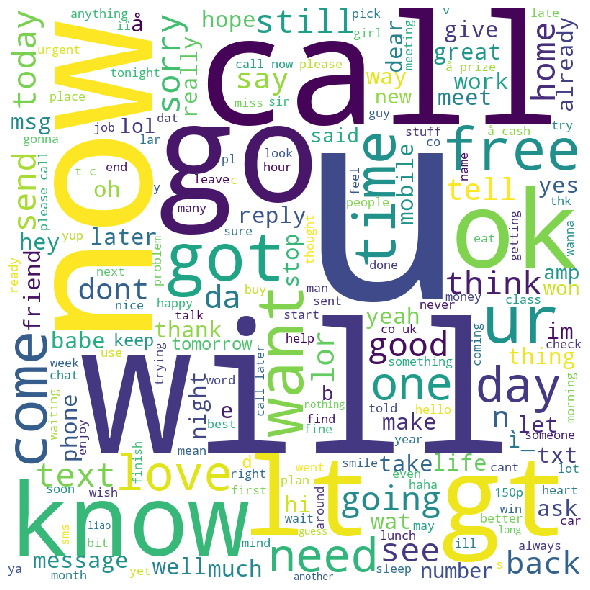

In [182]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df["text"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
    
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["text"])

In [184]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,8663,8664,8665,8666,8667,8668,8669,8670,8671,8672
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
from sklearn.model_selection import train_test_split
y = df["label"]
X_new = pd.concat([pd.DataFrame(X.toarray()), df["len_text"]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

In [186]:
from sklearn.ensemble import RandomForestClassifier
    
forestmodel = RandomForestClassifier(n_estimators=50, max_depth=80)
forestmodel.fit(X_train, y_train)

print('Score на трейні', forestmodel.score(X_train, y_train))
print('Score на тесті', forestmodel.score(X_test, y_test))

Score на трейні 0.9997435897435898
Score на тесті 0.9772727272727273


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1454
           1       0.99      0.83      0.91       218

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.95      1672
weighted avg       0.98      0.98      0.98      1672



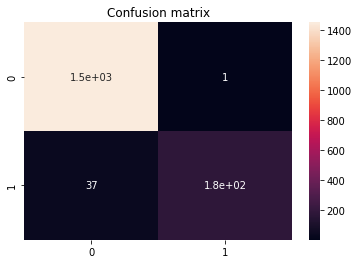

In [187]:
from sklearn.metrics import classification_report, confusion_matrix

def Metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

    ax = plt.axes()
    CM = confusion_matrix(y_test, y_pred)
    sns.heatmap(CM, annot = True, ax = ax, xticklabels=["0", "1"], yticklabels=["0", "1"])
    ax.set_title('Confusion matrix')
    i, k = ax.get_ylim() 
    ax.set_ylim(i+0.5, k-0.5)
    plt.show()

Metrics(forestmodel, X_test, y_test)